<a href="https://colab.research.google.com/github/prakash4191/project_hotelbooking/blob/main/updated_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of the Hotel Booking

We will use the Hotel Booking dataset for analysis

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. 

We will try to answer the following Questions

Have you ever wondered when the best time of year to book a hotel room is?

Or #the optimal length of stay in order to get the best daily rate?

What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

What are the Top 10 Countries of Origin of Hotel visitors (Guests) -Which Month is the Most Occupied with Bookings at the Hotel?

-How many Bookings were Cancelled at the Hotel?

-Which Month Has Highest Number of Cancellations By Hotel Type?

-How many Bookings were Cancelled by Hotel Type?

-Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status

-Total Number of Bookings by Market Segment

-Arrival Date Year vs Lead Time By Booking Cancellation Status

-Relationship between Special Requests and Cancellations

-How does the ADR Vary Over the Year by Hotel Type

-What is the Effect of Deposit Type on Cancellations

- % of customer requrired for parking spaces

# First Import necessary packages and import the dataset

In [6]:
#importing pandas,numpy,seaborn,matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem. 2.Univariable study. We'll just focus on the dependent variable and try to know a little bit more about it.

3.Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4.Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5.Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

#Mounting google drive

In [7]:
#Mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mounting path of data from google drive and reading csv file 

In [8]:
# Mounting path of data from google drive and reading csv file 

hb=pd.read_csv('/content/drive/MyDrive/DS/PROJECT/HOTEL BOOKING/Copy of Hotel Bookings.csv')

In [9]:
# Extracting infromation from 
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
hb.shape

(119390, 32)

#Dealing with Missing Values
Checking if data contains any missing values

In [11]:
hb.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [12]:
hb.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

Children column contains the count of children, so we will replace all the missing values


In [13]:
hb['children'].fillna(0,inplace=True)
hb['country'].fillna('xyz',inplace=True)
hb['company'].fillna(0,inplace=True)
hb['agent'].fillna(0,inplace=True)


In [14]:
hb.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [15]:
hb.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [16]:
# hb.drop(['agent','company'],axis=1,inplace=True)

In [17]:
hb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#Adding new cloumns

In [18]:
hb['total_staying_nights'] = hb['stays_in_week_nights'] + hb['stays_in_weekend_nights']

hb['total_people'] = hb['children'] + hb['babies'] + hb['adults']

In [19]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_staying_nights,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


# NOW DEALING WITH THE PORBLEM


# 1.What are the Top 10 Countries of Origin of Hotel visitors (Guests)


Text(0.5, 0, 'Country')

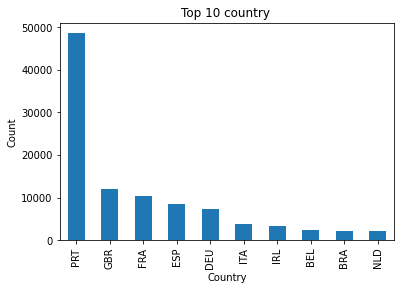

In [67]:
hb['country'].value_counts().head(10)

hb1 = hb["country"].value_counts().head(10)
hb1.plot(kind='bar')

plt.title('Top 10 country ')
plt.ylabel('Count')
plt.xlabel('Country')

Portugal, GBR ,France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

#2.Which Month is the Most Occupied with Bookings at the Hotel?

In [22]:
hb['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

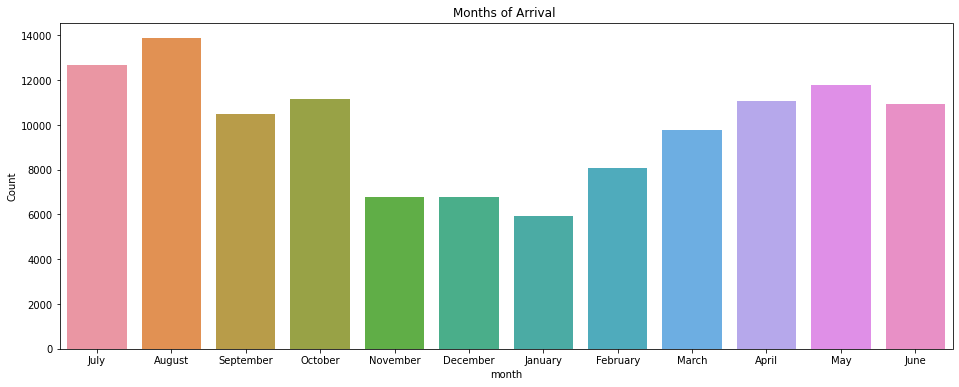

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month', data= hb)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()


August,July,May,october and April are the top month where booking has been done by  guests.

# 3.What is the booking ratio between Resort Hotel and City Hotel?

In [25]:
# hotel Booking
hb['hotel'].value_counts().head()


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

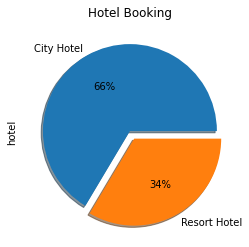

In [26]:
hotels=hb['hotel'].value_counts()
hotels.plot(kind='pie',autopct='%1.0f%%',shadow=True,explode=[0.0,0.1])
plt.title("Hotel Booking")
plt.show()

**Most Of the people have booked the City hotel

#4.Total Number of Bookings by Market Segment

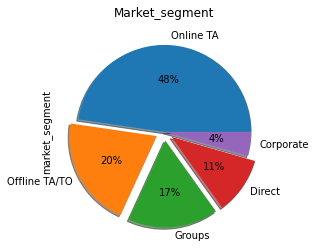

In [29]:
hb['market_segment'].value_counts().head()
hb3=hb['market_segment'].value_counts().head()
hb3.plot(kind='pie',autopct='%1.0f%%',shadow=True,explode=[0.0,0.1,0.1,0.1,0.0])
plt.title("Market_segment")
plt.show()



In market segment most of the booking have been done Onlne 

#5.Arrival per year 

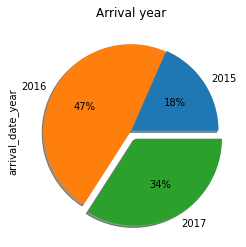

In [31]:
hb['arrival_date_year'].sort_index().value_counts(sort=False)

hb4 = hb['arrival_date_year'].sort_index().value_counts(sort=False)

hb4.plot(kind='pie',autopct='%1.0f%%',shadow=True,explode=[0.01,0.0,0.1])
plt.title("Arrival year")
plt.show()

In 2016 More booking was been done as compare with 2015 and 2017

#6.Arrival Date Year vs Lead Time By Booking Cancellation Status

Text(0, 0.5, 'ADR')

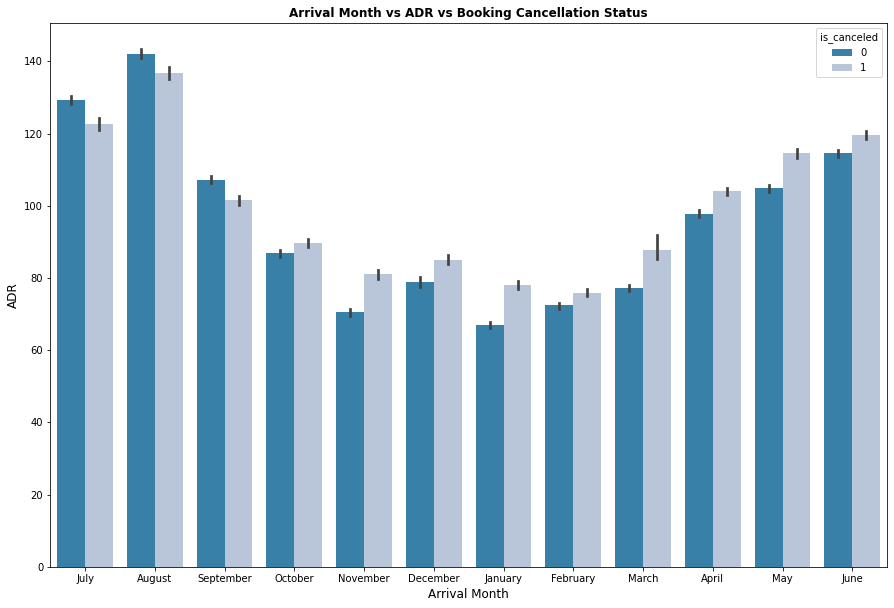

In [32]:
hb['adr'] = hb['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette='PuBu_r', data=hb)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# 7.How Long People Stay in the hotel

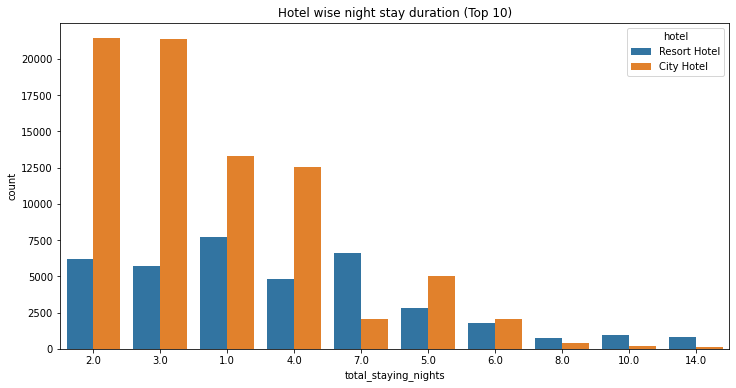

In [35]:

hb.loc['total_staying_nights'] = hb['stays_in_weekend_nights']+ hb['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_staying_nights', hue='hotel', data=hb,
              order = hb.total_staying_nights.value_counts().iloc[:10].index, ax=ax);

Most people stay for one, two, or three. More than 60% of guests come under these three options.

# 8. Preference of MEAL

In [69]:
hb['meal'].value_counts().head(10)

hb2=hb['meal'].value_counts().head(10)
hb2

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 0, 'MEAL')

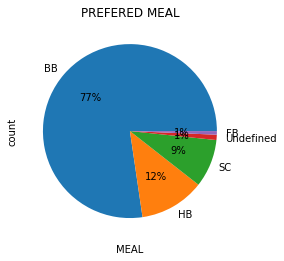

In [70]:
hb2=hb['meal'].value_counts().head(10)
hb2.plot(kind='pie',autopct='%1.0f%%')

plt.title('PREFERED MEAL')
plt.ylabel('count')
plt.xlabel('MEAL')

Most of the visitors preferred BB & HB and least preferred is FB 

# 09. Hotel preference by Customer Type 

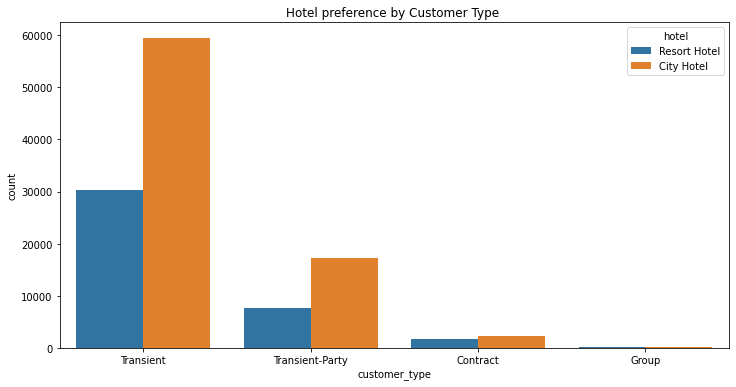

In [71]:


fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel preference by Customer Type ')
sns.countplot(x='customer_type', hue='hotel', data=hb,
              order = hb.customer_type.value_counts().iloc[:10].index, ax=ax);

Transient and transient party has done more booking and Preferred City Hotel to stay

# 10. Rate of Cancellation

Text(0.5, 1.0, 'Cancelled ')

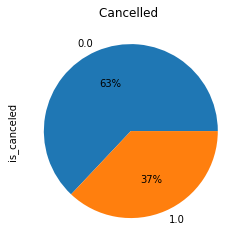

In [40]:
# 0 booking not-cancel 
# 1 booking cancel

hb3=hb['is_canceled'].value_counts()
hb3.plot(kind='pie',autopct='%1.0f%%')

plt.title('Cancelled ')


37 % of Total Booking got canceled 


# 11. Rate of Cancellation by Hotel Type

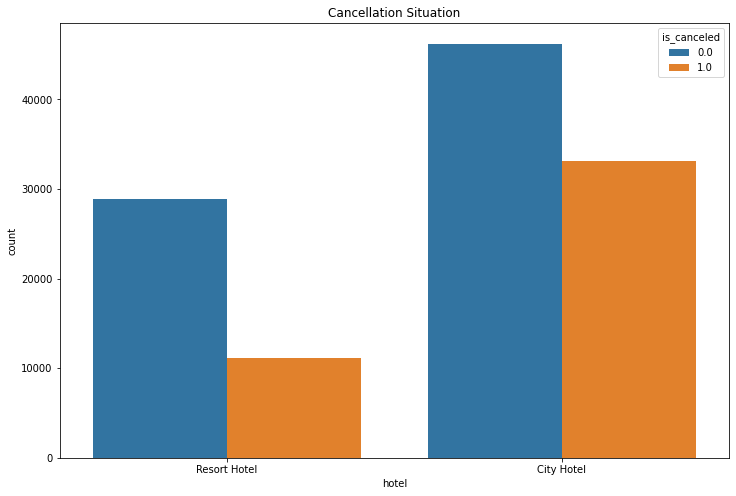

In [73]:
# 0 booking not-cancel 
# 1 booking cancel

plt.figure(figsize=(12,8))
sns.countplot(x='hotel', hue = 'is_canceled', data= hb)
plt.title('Cancellation Situation')
plt.show()



City Hotel has more rate of cancellation then Resort Hotel 

# 12. Top demading Room

In [42]:
hb['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K', nan],
      dtype=object)

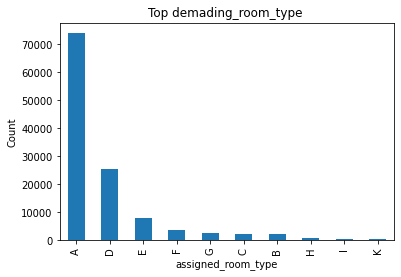

In [72]:
hb['assigned_room_type'].value_counts().head(10)

hb3 = hb["assigned_room_type"].value_counts().head(10)
hb3.plot(kind='bar')

plt.title('Top demading_room_type ')
plt.ylabel('Count')
plt.xlabel('assigned_room_type')
plt.show()

Room Type A is most preferred by the guest after that room type B Second most.

# 13.Lead Time Vs Cancelation

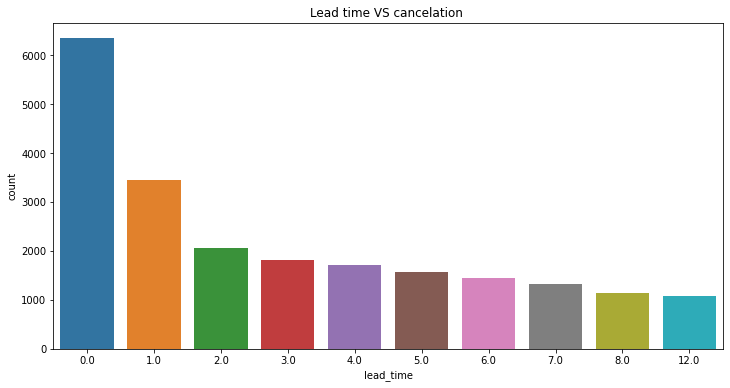

In [46]:

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('lead_time')
ax.set_ylabel('is_canceled')
ax.set_title('Lead time VS cancelation ')
sns.countplot(x='lead_time', data=hb,
              order = hb.lead_time.value_counts().iloc[:10].index, ax=ax);

As lead time decreases Cancelation increases 

# 14.Cancelation by Hotel

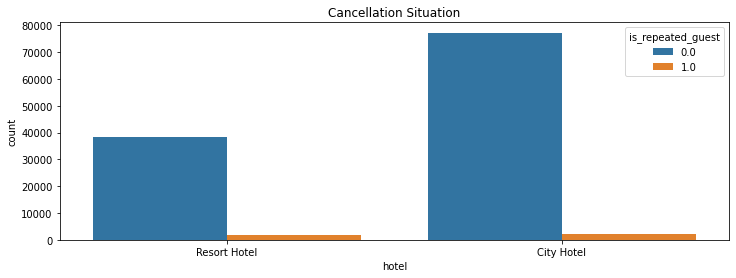

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(x='hotel', hue = 'is_repeated_guest', data= hb)
plt.title('Cancellation Situation')
plt.show()

# 15. Most Booking by agent ID

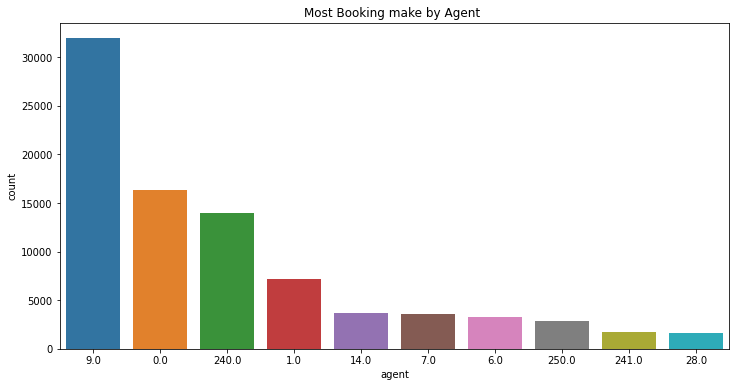

In [50]:

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('agent')
ax.set_ylabel('agent')
ax.set_title('Most Booking make by Agent ')
sns.countplot(x='agent', data=hb,
              order = hb.agent.value_counts().iloc[:10].index, ax=ax);

Agent ID – 9 has highest booking 

# 16. Parking Space requirement

Text(0.5, 1.0, 'required_car_parking_spaces ')

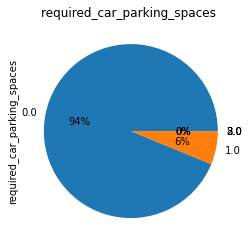

In [74]:

hb5=hb['required_car_parking_spaces'].value_counts()
hb5.plot(kind='pie',autopct='%1.0f%%')

plt.title('required_car_parking_spaces ')


Most of the guest do not require car parking. Only 6% of guest car parking 


# 17. Hotel Booking by Deposite Type

In [53]:
hb['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund', nan], dtype=object)

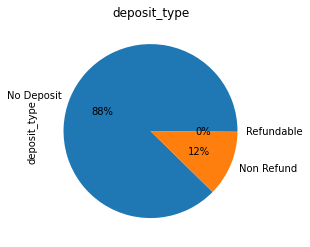

In [60]:
hb['deposit_type'].value_counts()
hb66=hb['deposit_type'].value_counts()
hb66.plot(kind='pie',autopct='%1.0f%%')

plt.title('deposit_type')
plt.show()

Almost all of the guest preferred no deposit type of booking at hotel

# 18. Repated Guest 

Text(0, 0.5, 'count')

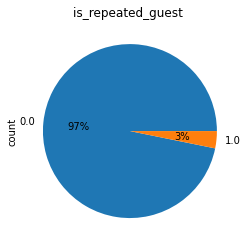

In [64]:
hb5=hb['is_repeated_guest'].value_counts()
hb5.plot(kind='pie',autopct='%1.0f%%')

plt.title('is_repeated_guest ')
plt.ylabel('count')


Only 3% of the total guest were repeat and 97 % were new guests. So tendency of repeat guest is less


# 19. Booking by Distribution Channel

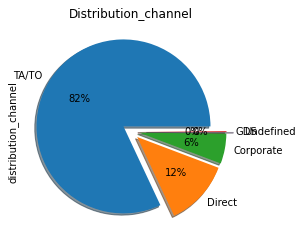

In [75]:
hb['distribution_channel'].value_counts().head()
hb6=hb['distribution_channel'].value_counts().head()
hb6.plot(kind='pie',autopct='%1.0f%%',shadow=True,explode=[0.1,0.1,0.1,0.1,0.2])
plt.title("Distribution_channel")
plt.show()

Most of the booking was done by TA/TO and direct.